In [1]:
import pandas as pd 
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from datetime import date, time, datetime, timedelta 

In [2]:
# Import Pandas and Numpy
import pandas as pd
import numpy as np

# Prepare necessary data
Dataset = pd.read_csv('boston_2019.csv', sep=',')
df = pd.DataFrame(Dataset['start_time'])
times = pd.to_datetime(df.start_time)

# Aggregate data by date and hour to get hourly values over the whole year.
df_agg = df.groupby([times.dt.date, times.dt.month]).agg(lambda col: col.tolist())

# prepare a new DataFrame with a new index and the lists of rents
df_result = pd.DataFrame(df_agg['start_time'])
df_result['month'] = ''

# Write date and hour for every line to identify exactly the hour
for i in range(0, len(df_agg)):
    df_result['month'].iloc[i] = pd.to_datetime(df_agg['start_time'].iloc[i][0]).floor('h')

df_result = df_result.set_index('month')

# Create an empty column. This will be filled in the next step!
df_result['rents_count'] = ''

# The following loop iterates through all cells and counts the rents.
for i in range(0, len(df_result)):
    df_result['rents_count'].iloc[i] = len(df_result['start_time'].iloc[i])

# Select the required results and export them as a csv
df_final_result = df_result['rents_count']
df_final_result.to_csv('KPI_total_rents_per_month.csv')

# If 'Done!' is the output everything went good and we have a new dataset for KPI total rents per hour.
print('Done!')

Done!


In [3]:
DS_Poly = pd.read_csv('LogiReg.csv')

In [4]:
DS_Poly = DS_Poly.drop(columns = ["hour_of_the_year","count_y", "Unnamed: 0"])

In [5]:
df = DS_Poly

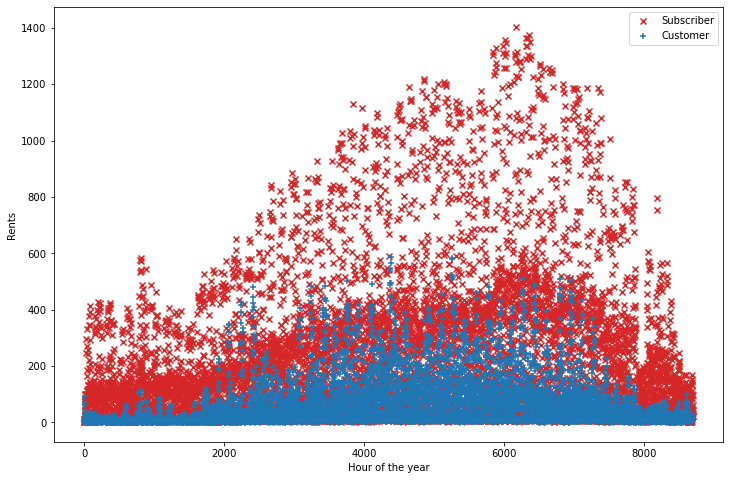

In [6]:
def plot_cells():
    plt.figure(figsize=(12,8))
    plt.scatter(df[df["user"]=='Subscriber']['count_x'], df[df["user"]=='Subscriber']['rents'], marker='x', color='C3')
    plt.scatter(df[df["user"]=='Customer']['count_x'], df[df["user"]=='Customer']['rents'], marker='+', color='C0')
    #plt.xlim([0,2600])
    #plt.ylim([0,0.21])
    plt.xlabel("Hour of the year")
    plt.ylabel("Rents")
    plt.legend(['Subscriber','Customer'])
    
plot_cells()